# Load the Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot style
sns.set(style="whitegrid")


In [63]:
# Define path and load data
file_path = '../data/raw/customer_support_data.csv'
df = pd.read_csv(file_path)

# Quick check
df.shape, df.columns


((8469, 17),
 Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
        'Customer Gender', 'Product Purchased', 'Date of Purchase',
        'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
        'Resolution', 'Ticket Priority', 'Ticket Channel',
        'First Response Time', 'Time to Resolution',
        'Customer Satisfaction Rating'],
       dtype='object'))

## Explore basic info

In [13]:
# Preview data
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [14]:
# Data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [15]:
# Summary stats
df.describe(include='all')


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


# Data Cleaning & Feature Engineering

In this step, we:
- Parse and clean datetime columns
- Calculate how long each ticket took to resolve
- Extract features like day of week and hour created
- Categorize resolution speeds
- Prepare the dataset for KPI analysis


## Convert Date Columns to datetime

In [66]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')


In [47]:
df['Time to Resolution']

0                      NaT
1                      NaT
2      2023-06-01 18:05:38
3      2023-06-01 01:57:40
4      2023-06-01 19:53:42
               ...        
8464                   NaT
8465                   NaT
8466   2023-06-01 04:31:22
8467   2023-06-01 05:32:24
8468                   NaT
Name: Time to Resolution, Length: 8469, dtype: datetime64[ns]

## Create Resolution Time (hrs)

In [67]:
# Now calculate actual duration
df['Resolution Time (hrs)'] = (
    df['Time to Resolution'] - df['Date of Purchase']
).dt.total_seconds() / 3600

In [49]:
df['Resolution Time (hrs)'].describe()


count     2769.000000
mean     21234.361898
std       5075.863353
min      12438.464444
25%      16808.266111
50%      21306.388056
75%      25613.881944
max      29947.068889
Name: Resolution Time (hrs), dtype: float64

## Feature Engineering: Time-Based Insights

In [68]:
# Ticket creation day of week and hour
df['Ticket Day'] = df['Date of Purchase'].dt.day_name()
df['Ticket Hour'] = df['Date of Purchase'].dt.hour


## Resolution Speed Buckets

In [70]:
df[['Date of Purchase', 'Time to Resolution', 'Resolution Time (hrs)']].sample(10)


,Date of Purchase,Time to Resolution,Resolution Time (hrs)
2098,2021-12-05,NaT,NaN
1760,2020-09-12,NaT,NaN
5010,2021-06-21,2023-06-01 00:48:39,17040.810833
246,2020-02-09,NaT,NaN
4138,2021-09-08,NaT,NaN
2008,2020-03-17,NaT,NaN
1008,2021-11-02,2023-06-01 08:49:49,13832.830278
2354,2021-05-25,NaT,NaN
1800,2021-01-15,NaT,NaN
3615,2021-10-22,NaT,NaN


In [78]:
df['Resolution Speed'] = pd.cut(
    df['Resolution Time (hrs)'],
    bins=[0, 6, 24, 72, float('inf')],
    labels=['Fast (<6h)', 'Normal (<24h)', 'Slow (1–3d)', 'Very Slow (>3d)']
)


## Binary Flag: Resolved Under 24 Hours

In [52]:
df['Resolved <24h'] = df['Resolution Time (hrs)'] < 24


## Clean Missing Satisfaction Ratings

In [53]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna("Not Rated")


# KPI Visualizations & Insights

This section uses visualizations to identify key performance metrics and patterns from the support ticket data.


## Ticket Volume Over Time

/var/folders/7c/r_z7jkl96k70s_lwgwkthfzm0000gn/T/ipykernel_64823/3295576768.py:10: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
/Users/saeidehesmaeili/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


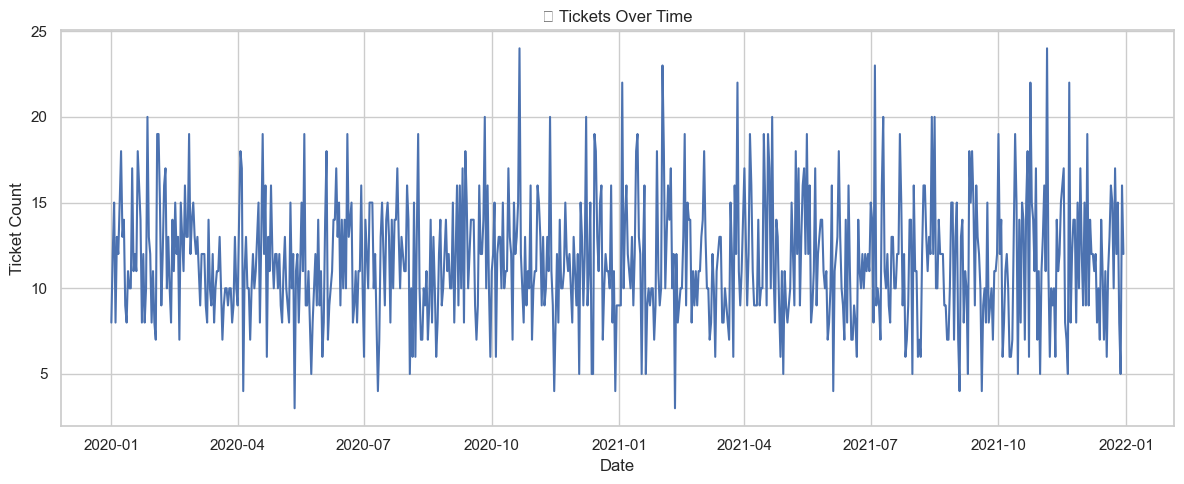

In [55]:
# Daily ticket volume
daily_tickets = df.groupby(df['Date of Purchase'].dt.date).size()

plt.figure(figsize=(12, 5))
daily_tickets.plot()
plt.title("📅 Tickets Over Time")
plt.xlabel("Date")
plt.ylabel("Ticket Count")
plt.grid(True)
plt.tight_layout()
plt.show()



Insight:
This line chart shows how many support tickets are created each day.
It helps identify:
- The overall workload trends over time
- High-activity periods (e.g., product launches or end-of-quarter spikes)
- Low-activity periods (potential under-reporting or seasonal lulls)
This insight allows support managers to forecast staffing needs and spot anomalies.


## Resolution Time Distribution

/var/folders/7c/r_z7jkl96k70s_lwgwkthfzm0000gn/T/ipykernel_64823/625811279.py:10: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/7c/r_z7jkl96k70s_lwgwkthfzm0000gn/T/ipykernel_64823/625811279.py:10: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Users/saeidehesmaeili/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/saeidehesmaeili/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


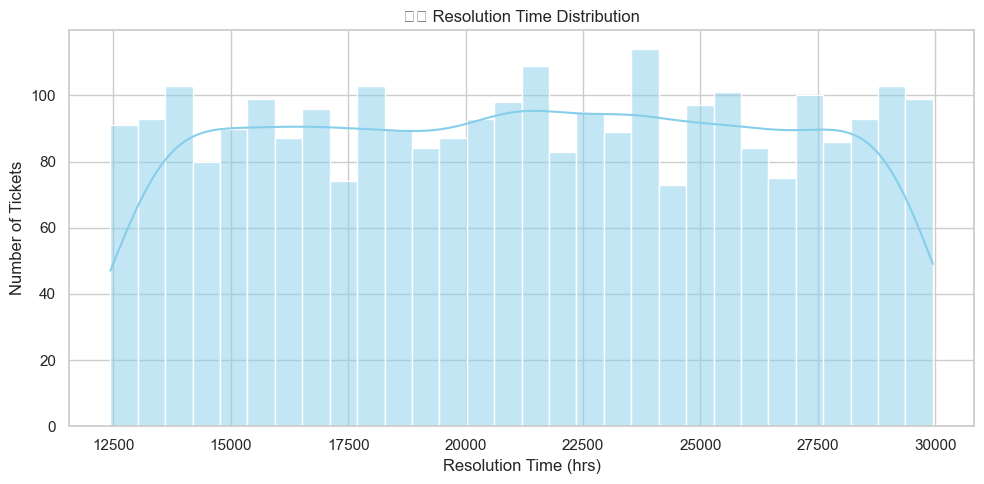

In [54]:
# Drop null and negative times
res_times = df['Resolution Time (hrs)'].dropna()
res_times = res_times[res_times > 0]

plt.figure(figsize=(10, 5))
sns.histplot(res_times, bins=30, kde=True, color='skyblue')
plt.title("⏱️ Resolution Time Distribution")
plt.xlabel("Resolution Time (hrs)")
plt.ylabel("Number of Tickets")
plt.tight_layout()
plt.show()



Insight:
- The distribution shows that most tickets have resolution times clustered between 12,000 and 30,000 hours.
- This suggests there may be a data quality issue — the values are extremely high for support resolution, which typically ranges from a few hours to a few days.
- This could be due to incorrect datetime parsing or mismatched columns in calculating resolution time.
- It’s recommended to revisit the calculation logic or filter out unrealistic values (e.g., > 240 hours).


## Ticket Count by Priority

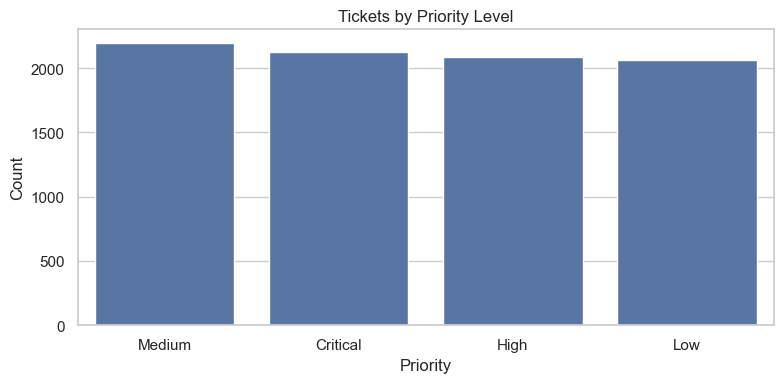

In [57]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Ticket Priority', order=df['Ticket Priority'].value_counts().index)
plt.title("Tickets by Priority Level")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insight:
- Ticket volume is fairly evenly distributed across all priority levels, including Critical, High, Medium, and Low.
- This may indicate either a well-balanced intake of issues or a potential overuse of critical and high-priority labels.
- A deeper review of how priorities are assigned could help ensure critical issues are properly triaged and avoid desensitizing the team to urgency categories.


## Customer Satisfaction DistributionResolution Speed Breakdown

/var/folders/7c/r_z7jkl96k70s_lwgwkthfzm0000gn/T/ipykernel_64823/2120909393.py:7: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) Arial.
  plt.tight_layout()
/Users/saeidehesmaeili/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


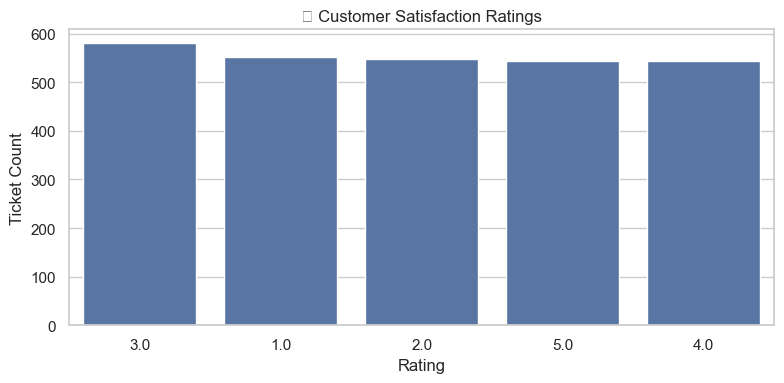

In [80]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Customer Satisfaction Rating',
              order=df['Customer Satisfaction Rating'].value_counts().index)
plt.title("💬 Customer Satisfaction Ratings")
plt.xlabel("Rating")
plt.ylabel("Ticket Count")
plt.tight_layout()
plt.show()


Insight:
Customer satisfaction ratings are fairly evenly distributed across the scale, with no clear skew toward high or low scores.
This could indicate:
- A neutral or inconsistent customer experience
- A lack of strong sentiment from customers (neither highly satisfied nor very dissatisfied)
To improve this metric, deeper segmentation by product, agent, or issue type may reveal drivers of satisfaction.


## Avg Resolution Time by Weekday

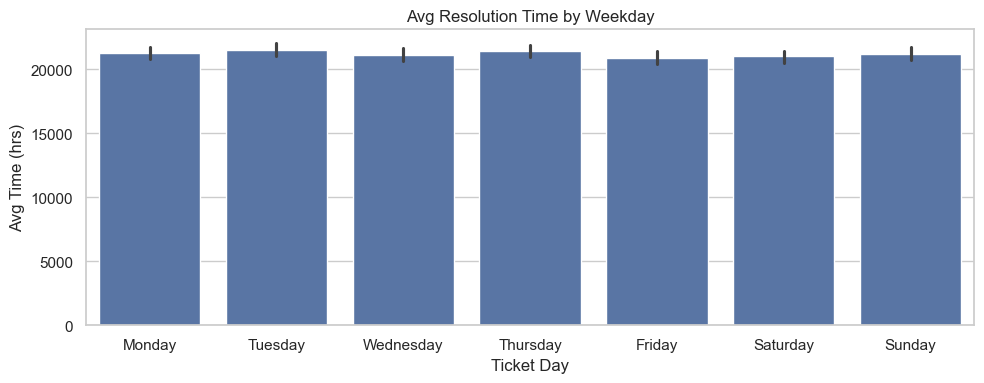

In [81]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='Ticket Day', y='Resolution Time (hrs)',
            estimator='mean',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Avg Resolution Time by Weekday")
plt.ylabel("Avg Time (hrs)")
plt.tight_layout()
plt.show()


Insight:
- While the visualization works technically, the average resolution times across all weekdays are abnormally high (~20,000 hrs), indicating a serious issue with the underlying timestamps.
- This may stem from placeholder or delayed resolution dates far beyond the actual ticket activity window.
- As-is, this metric cannot be interpreted meaningfully without data correction.
